In [4]:
# Implementing Quantum Teleportation

In [25]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

import numpy as np

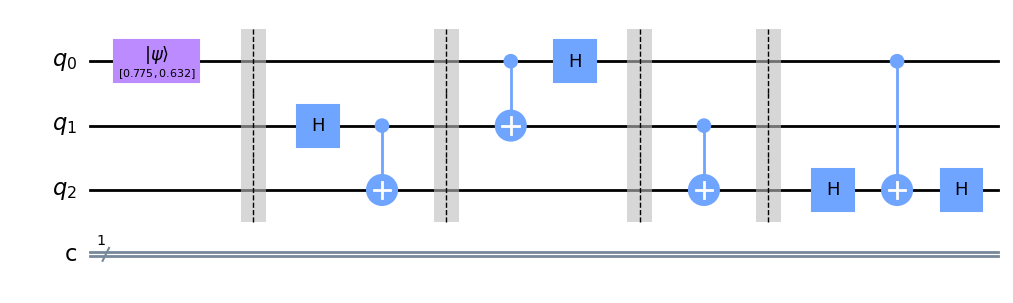

In [17]:
phi = [np.sqrt(0.6), np.sqrt(0.4)] # The state |phi> I want to teleport.
# Here, |phi> = sqrt(0.6) |0> + sqrt(0.4) |1> , because 0.6 + 0.4 = 1 implies |phi> is normalized.
tc = QuantumCircuit(3,1) # Circuit for quantum teleportation

# Initialize q_0 to |phi>
tc.initialize(phi, 0)
tc.barrier()

# Creating Bell state in q_1, q_2
tc.h(1)
tc.cx(1,2)
tc.barrier()

# Measurement in bell basis part on q_0
tc.cx(0,1)
tc.h(0)
tc.barrier()

# Controlled-X gate on q_2 (controlled by q_1)
tc.cx(1,2)
tc.barrier()

# Controlled-Z gate on q_2 (controlled by q_0) implemented as Z = H X H
tc.h(2)
tc.cx(0,2)
tc.h(2)

tc.draw()

In [18]:
# We didn't measure q_2 yet
# because we want to see the states of the 3 qubits after implementing the teleportation circuit using statevector simulator

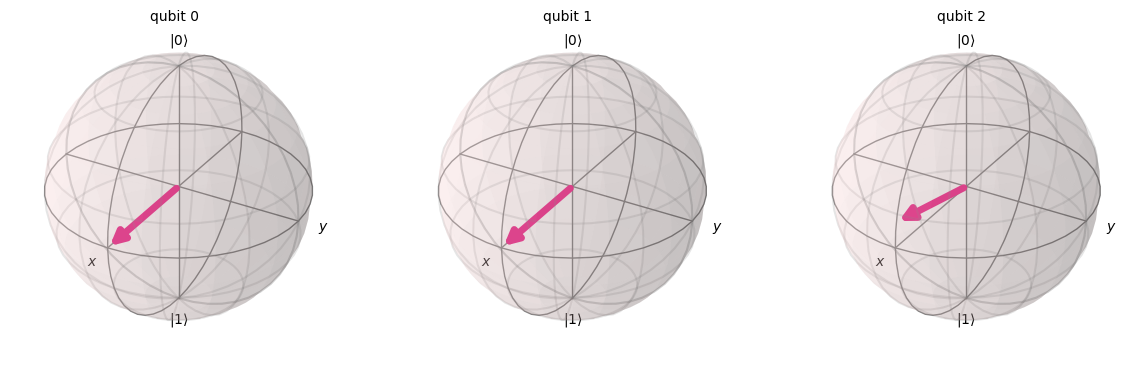

In [19]:
backend = Aer.get_backend('statevector_simulator')
output = execute(tc, backend).result().get_statevector()
plot_bloch_multivector(output)

In [20]:
# As expected, |q_0> = |0>, |q_1> = |0>, and |q_2> = |phi>
# If we measure q_2, we must get back the state |phi>

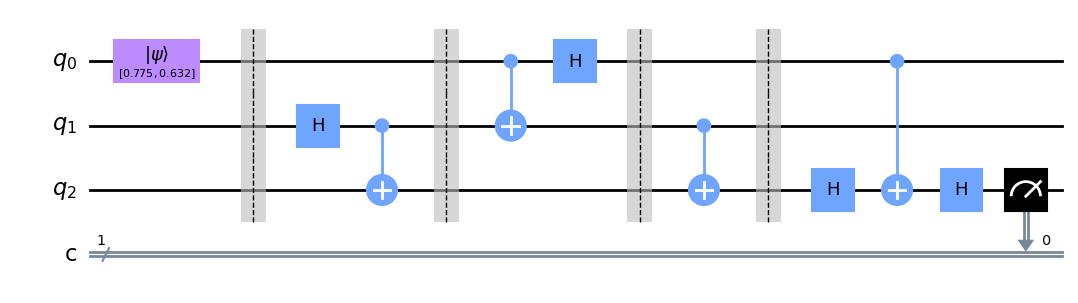

In [22]:
# Copy same code as for "tc", just add a q_2 measurement in the end

phi = [np.sqrt(0.6), np.sqrt(0.4)] # The state |phi> I want to teleport.
# Here, |phi> = sqrt(0.4) |0> + sqrt(0.6) |1> , because 0.4 + 0.6 = 1 implies |phi> is normalized.
tc2 = QuantumCircuit(3,1) # Circuit for quantum teleportation

# Initialize q_0 to |phi>
tc2.initialize(phi, 0)
tc2.barrier()

# Creating Bell state in q_1, q_2
tc2.h(1)
tc2.cx(1,2)
tc2.barrier()

# Measurement in bell basis part on q_0
tc2.cx(0,1)
tc2.h(0)
tc2.barrier()

# Controlled-X gate on q_2 (controlled by q_1)
tc2.cx(1,2)
tc2.barrier()

# Controlled-Z gate on q_2 (controlled by q_0) implemented as Z = H X H
tc2.h(2)
tc2.cx(0,2)
tc2.h(2)

# Measure q_2
tc2.measure(2,0)
tc2.draw()

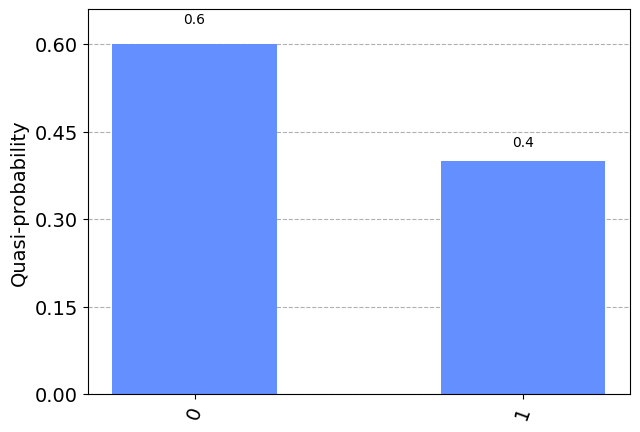

In [33]:
# Let us see the results

backend = Aer.get_backend('aer_simulator')
transpiled_tc2 = transpile(tc2, backend)
shots = 10000000
results = backend.run(transpiled_tc2, shots=shots).result()
counts = results.get_counts()
total_shots = sum(counts.values())
probabilities = {state: count/shots  for state, count in counts.items()}
plot_histogram(probabilities)

In [34]:
# For large no. of shots, we got the exact probability amplitudes of |0> and |1> in |phi>.
# Thus, |phi> = sqrt(0.6) |0> + sqrt(0.4) |1> has been teleported from q_0 to q_2.
# Measuring q_2 collapses q_0, q_1 to 0, 0 (as we saw earlier while observing statevectors), thereby not violating no-cloning theorem.